In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import matplotlib

data_dir = "./allendata"
df_numerical_file = data_dir + "/" + "df_numerical.csv"
df_numerical = pd.read_csv(df_numerical_file)

In [2]:
df_numerical.columns

Index(['Unnamed: 0', 'waveform_recovery_slope', 'max_drift', 'clusters'], dtype='object')

In [3]:
import umap
from sklearn.preprocessing import StandardScaler

def compute_umap(df, n_neighbors=15, min_dist=0.1, random_state=42):
    """
    Reduces a DataFrame of numerical values to 2D using UMAP.

    Parameters:
    - df: pandas.DataFrame, numerical data
    - n_neighbors: int, size of local neighborhood (UMAP parameter)
    - min_dist: float, minimum distance between points in the low-dimensional space
    - random_state: int, seed for reproducibility

    Returns:
    - pd.DataFrame with 2 columns: 'umap_x' and 'umap_y', indexed same as input df
    """
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # Fit UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
    embedding = reducer.fit_transform(X_scaled)

    # Return as DataFrame with same index
    return pd.DataFrame(embedding, columns=['x', 'y'], index=df.index)

umap = compute_umap(df_numerical)

/usr/local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


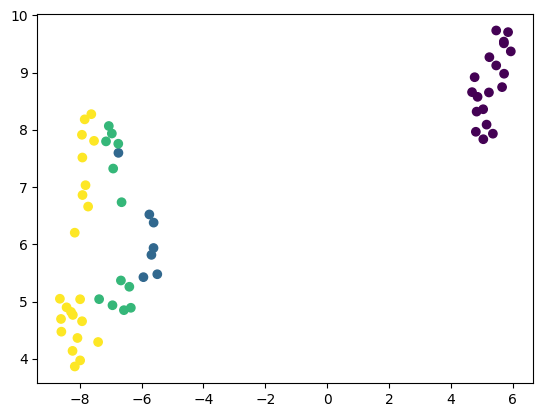

In [4]:
plt.scatter(umap['x'], umap['y'], c=df_numerical['clusters'])